In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install bnaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 64.2 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import pandas as pd

In [ ]:
trainDf = pd.read_csv("/content/drive/MyDrive/PR/Dataset/cleanTrain.csv")

In [ ]:
trainDf

,Unnamed: 0,sentence,target,type,hateSpeech
0,0,... ঐ ইন্দুর তোই মরছ নাই?,ind,callToViolence,1
1,1,#গেবনের শেষে আইসা আপনার মুখোশ টা খুলছে এতেই আম...,ind,callToViolence,1
2,2,মুরগি চোরের পাছায় ডুকবি আর মারবি।।।,ind,callToViolence,1
3,3,১৮ কোটির চোদা খাওয়া শেষে এখন ১৫০কোটির চোদা খা...,female,callToViolence,1
4,4,২য় মীর জাফরের মুখে মুতে দে...,male,callToViolence,1
...,...,...,...,...,...
40219,40219,গানটা চালু করে ওয়াস রুমে গিয়েছিলাম! এসে দেখি...,NaN,NaN,0
40220,40220,হালকার উপজেলা ঝাপসা,NaN,NaN,0
40221,40221,NaN,NaN,NaN,0
40222,40222,পুরাই আগুনের গুলা (),NaN,NaN,0


In [ ]:
print(trainDf.isnull().sum())

Unnamed: 0        0
sentence          2
target        20900
type          20900
hateSpeech        0
dtype: int64


In [ ]:
trainDf.type = trainDf.type.fillna('NotAHateSpeech')
trainDf.target = trainDf.target.fillna('common')

['callToViolence_gender_religion_slander', 'callToViolence_gender_religion', 'gender_religion_slander', 'gender_religion', 'callToViolence_gender_slander']

In [ ]:
trainDf.dropna(inplace=True)

In [ ]:
trainDf = trainDf.reset_index()
(trainDf.head(40209)).tail(5)

,index,Unnamed: 0,sentence,target,type,hateSpeech
40204,40204,40204,হ্যালো তুমি চিনেন মুসলমানদেরকে হেফাজত করো আল্ল...,common,NotAHateSpeech,0
40205,40205,40205,হ্যালো বন্ধুরা আমাকে তোমাদের বন্ধু বানিয়ে নাও...,common,NotAHateSpeech,0
40206,40206,40206,হ্যালো ম্যাডাম ভারতের ধ্বংস চায় বাংলাদেশ বিএফ...,common,NotAHateSpeech,0
40207,40207,40207,হ্যালো রেশমি আপু আপনি কেমন আছেন,common,NotAHateSpeech,0
40208,40209,40209,এজন্যই আসুন আমরা সন্তানদের সৎপথে চলার আদেশ এবং...,common,NotAHateSpeech,0


In [ ]:
trainDf = trainDf.drop(['Unnamed: 0', 'index'], axis=1)
(trainDf.head(40209)).tail(5)

,sentence,target,type,hateSpeech
40204,হ্যালো তুমি চিনেন মুসলমানদেরকে হেফাজত করো আল্ল...,common,NotAHateSpeech,0
40205,হ্যালো বন্ধুরা আমাকে তোমাদের বন্ধু বানিয়ে নাও...,common,NotAHateSpeech,0
40206,হ্যালো ম্যাডাম ভারতের ধ্বংস চায় বাংলাদেশ বিএফ...,common,NotAHateSpeech,0
40207,হ্যালো রেশমি আপু আপনি কেমন আছেন,common,NotAHateSpeech,0
40208,এজন্যই আসুন আমরা সন্তানদের সৎপথে চলার আদেশ এবং...,common,NotAHateSpeech,0


In [ ]:
print(trainDf.isnull().sum())

sentence      0
target        0
type          0
hateSpeech    0
dtype: int64


In [ ]:
df_groups = trainDf.groupby(['type'])['hateSpeech'].sum()
df_groups

type
NotAHateSpeech                               0
callToViolence                            2020
callToViolence_gender                      487
callToViolence_gender_religion              10
callToViolence_gender_religion_slander       2
callToViolence_gender_slander               77
callToViolence_religion                    184
callToViolence_religion_slander            101
callToViolence_slander                    2914
gender                                    2376
gender_religion                             38
gender_religion_slander                     10
gender_slander                             374
religion                                   618
religion_slander                           299
slander                                   9814
Name: hateSpeech, dtype: int64

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 <a list of 7 Text major ticklabel objects>)

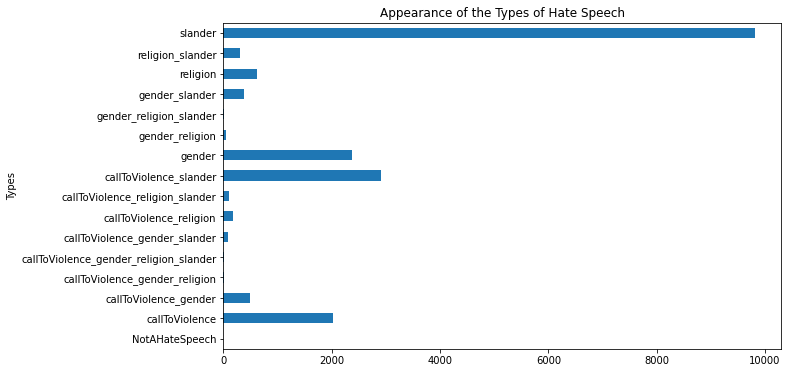

In [ ]:
import matplotlib.pyplot as plt

#create bar plot with custom aesthetics
df_groups.plot(kind='barh', title='Appearance of the Types of Hate Speech',
               ylabel='Total Appearance', xlabel='Types', figsize=(10, 6))

#rotate x-axis ticks vertically
plt.xticks(rotation=0)

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.]),
 <a list of 9 Text major ticklabel objects>)

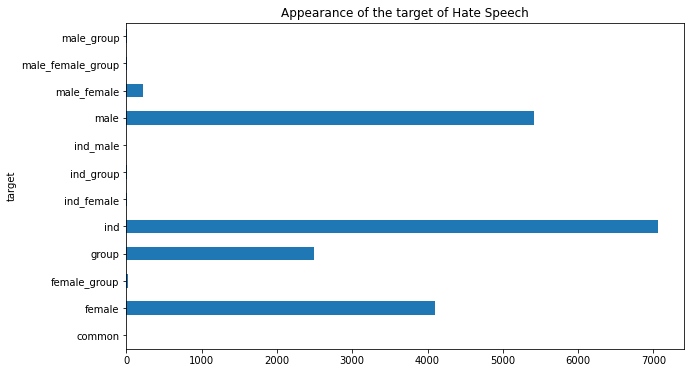

In [ ]:
df_target = trainDf.groupby(['target'])['hateSpeech'].sum()

import matplotlib.pyplot as plt

#create bar plot with custom aesthetics
df_target.plot(kind='barh', title='Appearance of the target of Hate Speech',
               ylabel='Total Appearance', xlabel='target', figsize=(10, 6))

#rotate x-axis ticks vertically
plt.xticks(rotation=0)

In [ ]:
trainDf

,sentence,target,type,hateSpeech
0,... ঐ ইন্দুর তোই মরছ নাই?,ind,callToViolence,1
1,#গেবনের শেষে আইসা আপনার মুখোশ টা খুলছে এতেই আম...,ind,callToViolence,1
2,মুরগি চোরের পাছায় ডুকবি আর মারবি।।।,ind,callToViolence,1
3,১৮ কোটির চোদা খাওয়া শেষে এখন ১৫০কোটির চোদা খা...,female,callToViolence,1
4,২য় মীর জাফরের মুখে মুতে দে...,male,callToViolence,1
...,...,...,...,...
40217,সাকিব ভাইয়া যেদিন খেলবে সেদিন আমি ক্রিকেটে খে...,common,NotAHateSpeech,0
40218,গানটা চালু করে ওয়াস রুমে গিয়েছিলাম! এসে দেখি...,common,NotAHateSpeech,0
40219,হালকার উপজেলা ঝাপসা,common,NotAHateSpeech,0
40220,পুরাই আগুনের গুলা (),common,NotAHateSpeech,0


In [ ]:
trainDf["type"][0]

'callToViolence'

In [ ]:
count_row = trainDf.shape[0]
count_row

40222

## Aug

In [ ]:
from bnaug.sentence import TokenReplacement

tokr = TokenReplacement()
AugModel = "/content/drive/MyDrive/PR/bangla_word2vec/bnwiki_word2vec.model"

def textAug(text, sentence):
  return tokr.word2vec_based(text, model=AugModel, sen_n=sentence, word_n=5)

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.8/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
def augmentationTT(trainDf, columnName):
  augTrainDf = pd.DataFrame(columns = ["sentence", "target",	"type",	"hateSpeech"])

  j = 0
  for i in range(count_row):
    
    if trainDf["type"][i] == columnName:
      output = textAug(trainDf['sentence'][i], 30)

      j = j
      k = 0
      for l in range(20):
        augTrainDf.loc[j] = [output[k], trainDf['target'][i], trainDf['type'][i], trainDf['hateSpeech'][i]]
        j = j + 1
        k = k + 1

    else:
      j = j
      augTrainDf.loc[j] = [trainDf['sentence'][i], trainDf['target'][i], trainDf['type'][i], trainDf['hateSpeech'][i]]
      
    j = j + 1
    print(i, " ", j)
  return augTrainDf

In [ ]:
columns = ['callToViolence_gender_religion_slander', 'callToViolence_gender_religion', 'gender_religion_slander', 'gender_religion', 'callToViolence_gender_slander']

df = (augmentationTT((augmentationTT((augmentationTT((augmentationTT((augmentationTT(trainDf, 
                       columns[0])).reset_index(drop=True), 
                       columns[1])).reset_index(drop=True), 
                       columns[2])).reset_index(drop=True), 
                       columns[3])).reset_index(drop=True), 
                       columns[4])).reset_index(drop=True)

Streaming output truncated to the last 5000 lines.
35222   36763
35223   36764
35224   36765
35225   36766
35226   36767
35227   36768
35228   36769
35229   36770
35230   36771
35231   36772
35232   36773
35233   36774
35234   36775
35235   36776
35236   36777
35237   36778
35238   36779
35239   36780
35240   36781
35241   36782
35242   36783
35243   36784
35244   36785
35245   36786
35246   36787
35247   36788
35248   36789
35249   36790
35250   36791
35251   36792
35252   36793
35253   36794
35254   36795
35255   36796
35256   36797
35257   36798
35258   36799
35259   36800
35260   36801
35261   36802
35262   36803
35263   36804
35264   36805
35265   36806
35266   36807
35267   36808
35268   36809
35269   36810
35270   36811
35271   36812
35272   36813
35273   36814
35274   36815
35275   36816
35276   36817
35277   36818
35278   36819
35279   36820
35280   36821
35281   36822
35282   36823
35283   36824
35284   36825
35285   36826
35286   36827
35287   36828
35288   36829
35289   368

In [ ]:
df

,sentence,target,type,hateSpeech
0,... ঐ ইন্দুর তোই মরছ নাই?,ind,callToViolence,1
1,#গেবনের শেষে আইসা আপনার মুখোশ টা খুলছে এতেই আম...,ind,callToViolence,1
2,মুরগি চোরের পাছায় ডুকবি আর মারবি।।।,ind,callToViolence,1
3,১৮ কোটির চোদা খাওয়া শেষে এখন ১৫০কোটির চোদা খা...,female,callToViolence,1
4,২য় মীর জাফরের মুখে মুতে দে...,male,callToViolence,1
...,...,...,...,...
41680,সাব্বির একটু উগ্রবাদী এটা সবাই জানে কিন্তু প্র...,common,NotAHateSpeech,0
41681,সাব্বির এখন উইকেটে একটু সময় নিয়ে খেলে যেটা এ...,common,NotAHateSpeech,0
41682,সাব্বির এটা কি সত্যি?আমি খেলব না তোমার সাথে আর,common,NotAHateSpeech,0
41683,সাব্বির এর পিছনে লাগছে কেনো বুঝলাম না? প্রথম স...,common,NotAHateSpeech,0


In [ ]:
df_groups = df.groupby(['type'])['hateSpeech'].sum()
df_groups

type
NotAHateSpeech                               0
callToViolence                            2020
callToViolence_gender                      487
callToViolence_gender_religion             200
callToViolence_gender_religion_slander      40
callToViolence_gender_slander             1540
callToViolence_religion                    184
callToViolence_religion_slander            101
callToViolence_slander                    2914
gender                                    2376
gender_religion                            760
gender_religion_slander                    200
gender_slander                             374
religion                                   618
religion_slander                           299
slander                                   9814
Name: hateSpeech, dtype: object

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 <a list of 7 Text major ticklabel objects>)

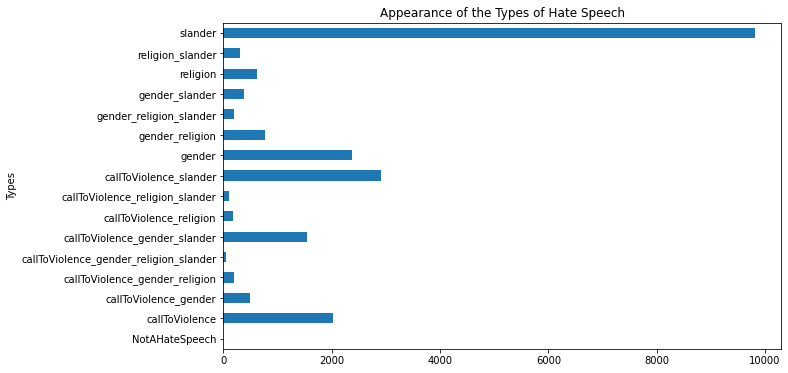

In [ ]:
import matplotlib.pyplot as plt

#create bar plot with custom aesthetics
df_groups.plot(kind='barh', title='Appearance of the Types of Hate Speech',
               ylabel='Total Appearance', xlabel='Types', figsize=(10, 6))

#rotate x-axis ticks vertically
plt.xticks(rotation=0)

**callToViolence_gender_religion_slander** was 2 and after augmentation it has become 40

In [ ]:
df.to_csv("/content/drive/MyDrive/PR/Dataset/augmentationDf.csv", index=False)